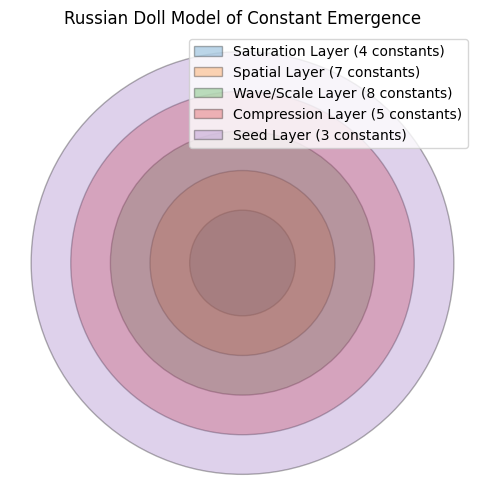

,Layer,Constant,Value,MatchScore,DigitResidueMap
3,Compression Layer,fine_structure,0.007297,5,✗✗✗✗✗✗✔✗✗✗✗✗
4,Compression Layer,alpha,0.007297,5,✗✗✗✗✗✗✔✗✗✗✗✔
5,Compression Layer,phi-1,0.618034,2,✗✗✗✗✗✔✗✗✗✗✗✗
6,Compression Layer,1/phi,0.618034,2,✗✗✗✗✗✔✗✗✗✗✗✗
7,Compression Layer,1/(phi-1),1.618034,2,✗✗✗✗✗✔✗✗✗✗✗✗
26,Saturation Layer,zeta_3,1.202057,3,✗✔✗✗✗✗✗✗✗✗✗✗
23,Saturation Layer,feigenbaum_delta,4.669202,2,✗✗✗✗✗✗✗✗✗✗✗✗
24,Saturation Layer,feigenbaum_alpha,2.502908,2,✗✗✗✗✗✗✔✗✗✗✗✗
25,Saturation Layer,euler_gamma,0.577216,2,✗✗✗✗✗✗✗✗✗✗✗✗
2,Seed Layer,1/fib_word_decimal,3.445940,3,✗✗✗✗✗✗✗✗✗✗✗✗


In [1]:
# 📦 Advanced GRA Colab Suite Extension: Fibonacci-Seeded Zeta Test, Layered Emergence Matching, and Russian Doll Symbolic Hierarchy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sympy import primerange
from IPython.display import display

# === CORE CONSTANTS ===
phi_f = (1 + math.sqrt(5)) / 2
alpha_inv = 137.035999
alpha = 1 / alpha_inv
fine_structure_decimal = 0.0072973525693
delta = math.pi - 3.141412303134

# Fibonacci word decimal seed
def fibonacci_word(n):
    a, b = "0", "01"
    for _ in range(n):
        a, b = b, b + a
    return b[:2**n]

fib_word_str = fibonacci_word(12)
fib_word_decimal = sum([int(b)*(0.5**(i+1)) for i,b in enumerate(fib_word_str)])
fib_word_decimal = fib_word_decimal if fib_word_decimal != 0 else 1e-10

# === Constants Grouped by Symbolic Layer ===
layers = {
    "Seed Layer": {
        "fib_word_decimal": fib_word_decimal,
        "1 - fib_word_decimal": 1 - fib_word_decimal,
        "1/fib_word_decimal": 1 / fib_word_decimal
    },
    "Compression Layer": {
        "fine_structure": fine_structure_decimal,
        "alpha": alpha,
        "phi-1": phi_f - 1,
        "1/phi": 1 / phi_f,
        "1/(phi-1)": 1 / (phi_f - 1),
    },
    "Wave/Scale Layer": {
        "sqrt(2)": math.sqrt(2),
        "sqrt(sqrt(2))": math.sqrt(math.sqrt(2)),
        "1/sqrt(2)": 1 / math.sqrt(2),
        "1/sqrt(sqrt(2))": 1 / math.sqrt(math.sqrt(2)),
        "sqrt(3)": math.sqrt(3),
        "sqrt(sqrt(3))": math.sqrt(math.sqrt(3)),
        "1/sqrt(3)": 1 / math.sqrt(3),
        "1/sqrt(sqrt(3))": 1 / math.sqrt(math.sqrt(3)),
    },
    "Spatial Layer": {
        "pi": math.pi,
        "pi/2": math.pi / 2,
        "pi/3": math.pi / 3,
        "pi/4": math.pi / 4,
        "pi-3": math.pi - 3,
        "sqrt(pi)": math.sqrt(math.pi),
        "pi/sqrt(3)": math.pi / math.sqrt(3)
    },
    "Saturation Layer": {
        "feigenbaum_delta": 4.669201609,
        "feigenbaum_alpha": 2.502907875,
        "euler_gamma": 0.5772156649,
        "zeta_3": 1.2020569031
    }
}

# Flatten layers into one dict for evaluation
flattened_constants = {}
for group, consts in layers.items():
    for k, v in consts.items():
        flattened_constants[k] = v

# === Golden-Zeta Calculator (safe) ===
def golden_zeta(N=50, base_seed=phi_f, log_term_cutoff=-700):
    primes = list(primerange(1, 1000))[:N]
    terms = []
    try:
        for i, p in enumerate(primes):
            exponent = base_seed ** (i + 1)
            log_term = -exponent * math.log(p)
            terms.append(math.exp(log_term) if log_term > log_term_cutoff else 0)
    except:
        terms.append(0)
    return sum(terms), alpha_inv * sum(terms)

# === Digit Match Score & Residue ===
def digit_match_score(a, b, window=6):
    a_str = f"{a:.16f}".replace('.', '')
    b_str = f"{b:.16f}".replace('.', '')
    max_score = 0
    for i in range(len(a_str)-window):
        a_sub = a_str[i:i+window]
        for j in range(len(b_str)-window):
            b_sub = b_str[j:j+window]
            score = sum(x==y for x, y in zip(a_sub, b_sub))
            max_score = max(max_score, score)
    return max_score

def digit_residue_map(a, b, digits=12):
    a_str = f"{a:.16f}".replace('.', '')[:digits]
    b_str = f"{b:.16f}".replace('.', '')[:digits]
    return ''.join(['✔' if x==y else '✗' for x, y in zip(a_str, b_str)])

# === Evaluation over Layers ===
def evaluate_by_layers(N=50):
    zeta_val, scaled_zeta = golden_zeta(N=N, base_seed=phi_f)
    evaluations = []
    for layer, consts in layers.items():
        for name, value in consts.items():
            score = digit_match_score(scaled_zeta, value)
            residue = digit_residue_map(scaled_zeta, value)
            evaluations.append((layer, name, value, score, residue))
    df = pd.DataFrame(evaluations, columns=["Layer", "Constant", "Value", "MatchScore", "DigitResidueMap"])
    return df.sort_values(["Layer", "MatchScore"], ascending=[True, False])

# === Russian Doll Layer Plot ===
def russian_doll_plot():
    layer_names = list(layers.keys())
    sizes = [len(layers[layer]) for layer in layer_names]
    fig, ax = plt.subplots(figsize=(6, 6))
    outer_radius = 1.0
    for i, (name, size) in enumerate(zip(layer_names[::-1], sizes[::-1])):
        circle = plt.Circle((0.5, 0.5), radius=outer_radius * (0.2 + i * 0.15),
                            label=name, alpha=0.3, edgecolor='black', facecolor=f"C{i}")
        ax.add_patch(circle)
    plt.title("Russian Doll Model of Constant Emergence")
    plt.axis('equal')
    plt.axis('off')
    legend_labels = [f"{layer_names[::-1][i]} ({sizes[::-1][i]} constants)" for i in range(len(sizes))]
    plt.legend(legend_labels, loc='upper right')
    plt.show()

# === Run Everything ===
df_layers = evaluate_by_layers(N=50)
russian_doll_plot()
display(df_layers.style.set_properties(**{'font-family': 'monospace'}).background_gradient(subset=["MatchScore"], cmap='YlGnBu'))
